>[EM-алгоритм та розділення суміші Гаусівських функцій](#scrollTo=JloT9gT5DzkI)

>>[Задачі кластеризації](#scrollTo=HV2ND-WlEBhI)

>>[Оптимізацію параметрів суміші](#scrollTo=N8vn65ZNECe9)

>>>[1 | Реалізація крок за кроком алгоритму очікування-максимізації.](#scrollTo=xShmbJAEEXRh)

>>>[2 | Реалізація 2](#scrollTo=r5_Y-79Ao6Ta)

>>>[3 | використання бібліотеки Sklearn](#scrollTo=pWIxvqM0mrTa)

>>[Суміші Гаусса та LDA](#scrollTo=JWXpQlpeED5J)

>>>[More complex MDA](#scrollTo=34DKGe0FJZ0H)

>[Додаткові матеріали](#scrollTo=tsBuwPgldnRV)



https://sandipanweb.wordpress.com/2017/03/19/hard-soft-clustering-with-k-means-weighted-k-means-and-gmm-em/ - Soft and hard clastering

# EM-алгоритм та розділення суміші Гаусівських функцій



## Задачі кластеризації


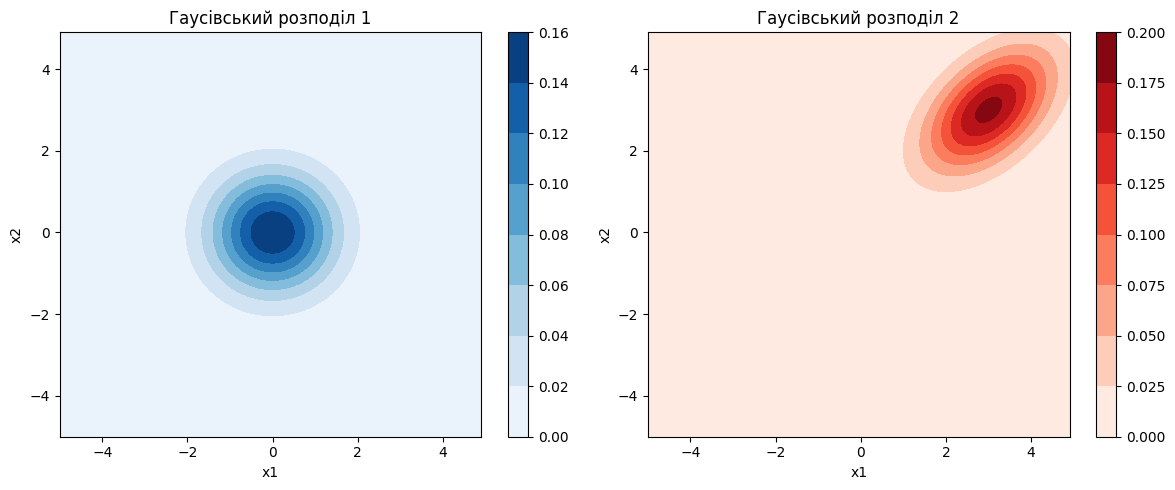

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Параметри першого гаусівського розподілу
mu1 = np.array([0, 0])
sigma1 = np.array([[1, 0], [0, 1]])

# Параметри другого гаусівського розподілу
mu2 = np.array([3, 3])
sigma2 = np.array([[1, 0.5], [0.5, 1]])

# Створення сітки точок для обчислення значень густини ймовірності
x, y = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

# Обчислення значень густини ймовірності для першого гаусівського розподілу
rv1 = multivariate_normal(mu1, sigma1)
pdf1 = rv1.pdf(pos)

# Обчислення значень густини ймовірності для другого гаусівського розподілу
rv2 = multivariate_normal(mu2, sigma2)
pdf2 = rv2.pdf(pos)

# Побудова графіків
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(x, y, pdf1, cmap='Blues')
plt.title('Гаусівський розподіл 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(x, y, pdf2, cmap='Reds')
plt.title('Гаусівський розподіл 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.tight_layout()
plt.show()


Тепер давайте побудуємо графік суміші цих двох гаусівських розподілів.



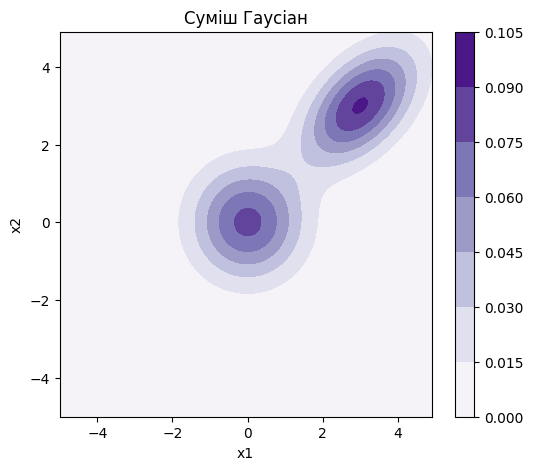

In [ ]:
# Обчислення значень густини ймовірності для суміші Гауса
pdf_mixture = 0.5 * pdf1 + 0.5 * pdf2

# Побудова графіка суміші Гауса
plt.figure(figsize=(6, 5))
plt.contourf(x, y, pdf_mixture, cmap='Purples')
plt.title('Суміш Гаусіан')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()



## Оптимізацію параметрів суміші



**Ініціалізація (Initialization):**
- Спочатку розглядається набір початкових значень параметрів.
- Системі надаються неповні спостережені дані з припущенням, що вони походять з певної моделі.

**E-Крок (Крок очікування):**
- Використовуйте спостережені дані для оцінки або вгадування значень відсутніх або неповних даних.
- Обчисліть апостеріорну ймовірність або відповідальність кожної латентної змінної, враховуючи спостережені дані та поточні оцінки параметрів.
- Оцініть відсутні або неповні значення даних за поточними оцінками параметрів.
- Обчисліть логарифмічну ймовірність спостережень на основі поточних оцінок параметрів та оцінених відсутніх даних.

**M-Крок (Крок максимізації):**
- Використовуйте повні дані, згенеровані на етапі E, для оновлення значень параметрів.
- Оновіть параметри моделі, максимізуючи очікуваний логарифмічний ймовірність повних даних, отриманих на етапі E.
- Це, як правило, включає вирішення задач оптимізації для знаходження значень параметрів, які максимізують логарифмічну ймовірність.
- Специфічна техніка оптимізації, яка використовується, залежить від характеру задачі та використовуваної моделі.

**Збіжність (Convergence):**
- Перевірте, чи збігаються значення.
- Якщо так, зупиніться; в іншому випадку повторюйте E-крок і M-крок.
- Перевірте збіжність, порівнюючи зміну логарифмічної ймовірності або значень параметрів між ітераціями.
- Якщо зміна нижче попередньо встановленого порогу, зупиніться та вважайте, що алгоритм збігся.
- В іншому випадку поверніться до етапу E і повторіть процес, доки не буде досягнута збіжність.

### 1 | Реалізація крок за кроком алгоритму очікування-максимізації.

Import the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

Generate a dataset with two Gaussian components

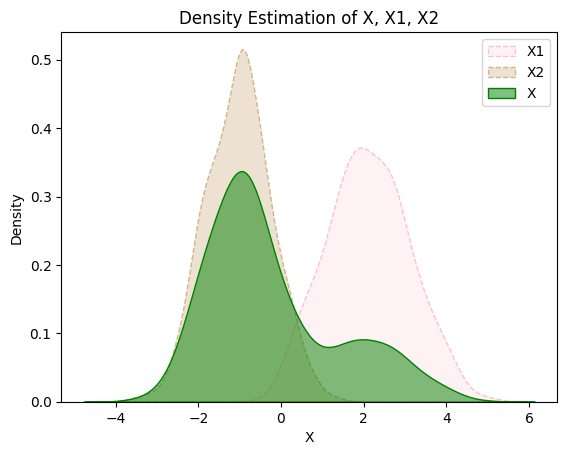

In [ ]:
# Generate a dataset with two Gaussian components
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])


# Plot the density estimation using seaborn
sns.kdeplot(X1, color='pink', alpha=0.2, label='X1', linestyle='--', fill=True)
sns.kdeplot(X2, color='tan', alpha=0.4, label='X2', linestyle='--', fill=True)
sns.kdeplot(X, color='g', alpha=0.5, label='X', linestyle='-', fill=True)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X, X1, X2')
plt.legend()
plt.show()

Initialize parameters

In [ ]:
# Initialize parameters
mu1_hat, sigma1_hat = np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1) / len(X), len(X2) / len(X)


Perform EM algorithm

- Iterates for the specified number of epochs (20 in this case).
- In each epoch, the E-step calculates the responsibilities (gamma values) by evaluating the Gaussian probability densities for each component and weighting them by the corresponding proportions.
- The M-step updates the parameters by computing the weighted mean and standard deviation for each component

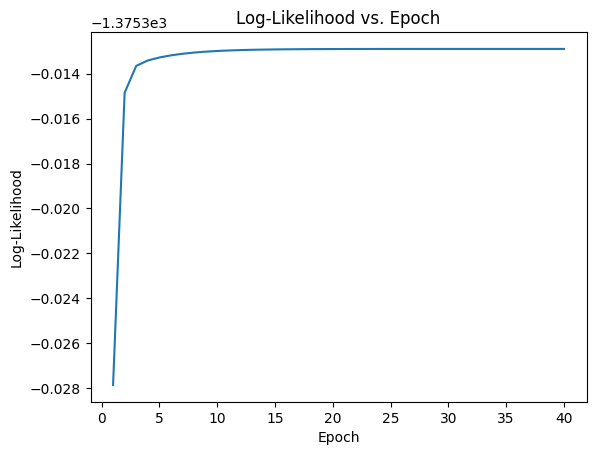

In [ ]:
# Perform EM algorithm for 20 epochs
num_epochs = 40
log_likelihoods = []

for epoch in range(num_epochs):
	# E-step: Compute responsibilities
	gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
	gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
	total = gamma1 + gamma2
	gamma1 /= total
	gamma2 /= total

	# M-step: Update parameters
	mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
	mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
	sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
	sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
	pi1_hat = np.mean(gamma1)
	pi2_hat = np.mean(gamma2)

	# Compute log-likelihood
	log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
								+ pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
	log_likelihoods.append(log_likelihood)

# Plot log-likelihood values over epochs
plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()


Plot the final estimated density

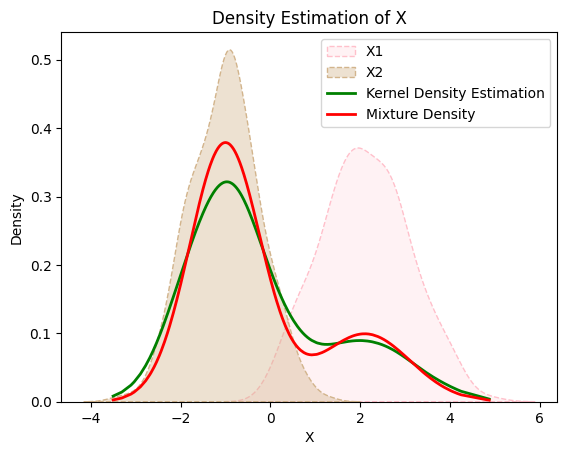

In [ ]:
def gaussian_kde(x, data, bandwidth=0.5):
    n = len(data)
    kde = np.zeros_like(x)
    for i in range(len(x)):
        kde[i] = np.sum(norm.pdf((x[i] - data) / bandwidth)) / (n * bandwidth)
    return kde

# Plot the final estimated density
X_sorted = np.sort(X)
density_estimation = pi1_hat * norm.pdf(X_sorted, mu1_hat, sigma1_hat) + pi2_hat * norm.pdf(X_sorted, mu2_hat, sigma2_hat)

sns.kdeplot(X1, color='pink', alpha=0.2, label='X1', linestyle='--', fill=True)
sns.kdeplot(X2, color='tan', alpha=0.4, label='X2', linestyle='--', fill=True)
plt.plot(X_sorted, gaussian_kde(X_sorted, X_sorted), color='green', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.legend(['X1', 'X2','Kernel Density Estimation', 'Mixture Density'])
plt.show()




**Застосування алгоритму EM (EM algorithm):**
- Він може бути використаний для заповнення відсутніх даних у вибірці.
- Він може бути використаний як основа ненавчального вивчення кластерів.
- Він може бути використаний для оцінки параметрів моделі Прихованої Марковської Моделі (HMM).
- Він може бути використаний для виявлення значень латентних змінних.

**Переваги алгоритму EM (EM algorithm):**
- Завжди гарантується, що ймовірність збільшиться з кожною ітерацією.
- Етапи E (E-step) та M (M-step) часто є простими для багатьох проблем у відносної реалізації.
- Рішення для етапів M (M-steps) часто мають закритий вигляд.

**Недоліки алгоритму EM (EM algorithm):**
- Має повільну збіжність.
- Збігається тільки до локальних оптимумів.
- Вимагає обчислення як передня, так і задня ймовірностей (числова оптимізація вимагає лише передню ймовірність).

### 2 | Реалізація 2

In [ ]:
import numpy as np
from scipy.stats import norm

n_samples = 100
mu1, sigma1 = -5, 1.5
mu2, sigma2 = 5, 2
mu3, sigma3 = 0, 3

x1 = np.random.normal(loc = mu1, scale = np.sqrt(sigma1), size = n_samples)
x2 = np.random.normal(loc = mu2, scale = np.sqrt(sigma2), size = n_samples)
x3 = np.random.normal(loc = mu3, scale = np.sqrt(sigma3), size = n_samples)

X = np.concatenate((x1,x2,x3))

Cтворимо допоміжну функцію для побудови наших даних.

In [ ]:
def plot_pdf(mu,sigma,label,alpha=0.5,linestyle='k--',density=True,color='green'):
    """
    Plot 1-D data and its PDF curve.

    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The input data.
    """
    # Compute the mean and standard deviation of the data

    # Plot the data

    X = norm.rvs(mu, sigma, size=1000)

    plt.hist(X, bins=50, density=density, alpha=alpha,label=label,color=color)

    # Plot the PDF
    x = np.linspace(X.min(), X.max(), 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, linestyle)


І побудуємо згенеровані дані таким чином. Побудуємо графік щільності ймовірності кожної вибірки.

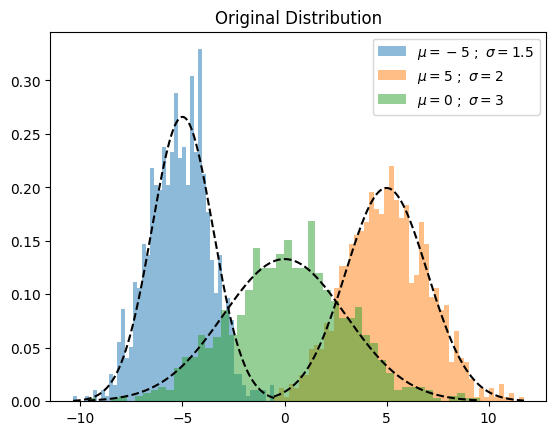

In [ ]:
plot_pdf(mu1,sigma1,label=r"$\mu={} \ ; \ \sigma={}$".format(mu1,sigma1),color=None)
plot_pdf(mu2,sigma2,label=r"$\mu={} \ ; \ \sigma={}$".format(mu2,sigma2),color=None)
plot_pdf(mu3,sigma3,label=r"$\mu={} \ ; \ \sigma={}$".format(mu3,sigma3),color=None)
plt.title("Original Distribution")
plt.legend()
plt.show()

Давайте побудуємо кожен крок, описаний у попередньому розділі.

Крок 01: Ініціалізація середнього значення, коваріації та ваги.



In [ ]:
def random_init(n_compenents):

    """Initialize means, weights and variance randomly"""

    pi = np.ones((n_compenents)) / n_compenents
    means = np.random.choice(X, n_compenents)
    variances = np.random.random_sample(size=n_compenents)
    plot_pdf(means[0],variances[0],'Random Init 01',)
    plot_pdf(means[1],variances[1],'Random Init 02',color='blue')
    plot_pdf(means[2],variances[2],'Random Init 03',color='orange')

    plt.title("Random Initialization")

    plt.legend()
    plt.show()

    return means,variances,pi

Крок 02: Крок очікування (крок E).

In [ ]:
def step_expectation(X,n_components,means,variances):
    """E Step

    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The data.
    n_components : int
        The number of clusters
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.

    Returns
    -------
    weights : array-like, shape (n_components,n_samples)
    """
    weights = np.zeros((n_components,len(X)))
    for j in range(n_components):
        weights[j,:] = norm(loc=means[j],scale=np.sqrt(variances[j])).pdf(X)
    return weights

Після цієї функції ми розглянули перші два рівняння, які ми обговорювали в E Step. Тут ми згенерували розподіл Гауса для поточних середніх значень і дисперсій параметрів моделі. Ми досягли цього, використовуючи модуль статистики scipy. Після цього ми використали метод pdf для розрахунку ймовірності належності до кожної точки даних для кожного кластера.

Крок 03: Крок максимізації (крок M).

In [ ]:
def step_maximization(X,weights,means,variances,n_compenents,pi):
    """M Step

    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The data.
    weights : array-like, shape (n_components,n_samples)
        initilized weights array
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
    n_components : int
        The number of clusters
    pi: array-like (n_components,)
        mixture component weights

    Returns
    -------
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
    """
    r = []
    for j in range(n_compenents):
        r.append((weights[j] * pi[j]) / (np.sum([weights[i] * pi[i] for i in range(n_compenents)], axis=0)))

        means[j] = np.sum(r[j] * X) / (np.sum(r[j]))
        variances[j] = np.sum(r[j] * np.square(X - means[j])) / (np.sum(r[j]))

        pi[j] = np.mean(r[j])

    return variances,means,pi

In [ ]:
def plot_intermediate_steps(means,variances,density=False,save=False,file_name=None):

    plot_pdf(mu1,sigma1,alpha=0.0,linestyle='r--',label='Original Distibutions')
    plot_pdf(mu2,sigma2,alpha=0.0,linestyle='r--',label='Original Distibutions')
    plot_pdf(mu3,sigma3,alpha=0.0,linestyle='r--',label='Original Distibutions')

    color_gen = (x for x in ['green','blue','orange'])

    for mu,sigma in zip(means,variances):
        plot_pdf(mu,sigma,alpha=0.5,label='d',color=next(color_gen))
    if save or file_name is not None:
        step = file_name.split("_")[1]
        plt.title(f"step: {step}")
        plt.savefig(f"steps/{file_name}.png",bbox_inches='tight')
    plt.show()

Реалізуємо навчальний цикл.

In [ ]:
def assign_labels(data, means, variances, pi, n_components):
    """ Assign data points to the cluster with the highest likelihood.

    Parameters
    ----------
    data : array-like, shape (n_samples,)
        The data points.
    means : array-like, shape (n_components,)
        Means of the clusters.
    variances : array-like, shape (n_components,)
        Variances of the clusters.
    pi : array-like, shape (n_components,)
        Mixture proportions.

    Returns
    -------
    labels : array, shape (n_samples,)
        Cluster labels for each data point.
    """
    n_samples = data.shape[0]
    likelihoods = np.zeros((n_samples, n_components))
    for k in range(n_components):
        likelihoods[:, k] = pi[k] * norm.pdf(data, means[k], np.sqrt(variances[k]))
    labels = np.argmax(likelihoods, axis=1)
    return labels


def train_gmm(data, n_components=3, n_steps=20, plot_intermediate_steps_flag=True):
    """ Training step of the GMM model with label extraction.

    Parameters
    ----------
    data : array-like, shape (n_samples,)
        The data.
    n_components : int
        The number of clusters.
    n_steps : int
        Number of iterations to run.
    plot_intermediate_steps_flag : bool
        Flag to control plotting of intermediate steps.

    Returns
    -------
    labels : array, shape (n_samples,)
        Cluster labels for each data point.
    """

    means, variances, pi = random_init(n_components)
    for step in range(n_steps):
        weights = step_expectation(data, n_components, means, variances)
        variances, means, pi = step_maximization(data, weights, means, variances, n_components, pi)
        if plot_intermediate_steps_flag:
            plot_intermediate_steps(means, variances)  # Optional plotting

    # After training, assign labels
    labels = assign_labels(data, means, variances, pi, n_components)

    # Final plot with the assigned labels if needed
    plot_intermediate_steps(means, variances)

    return labels

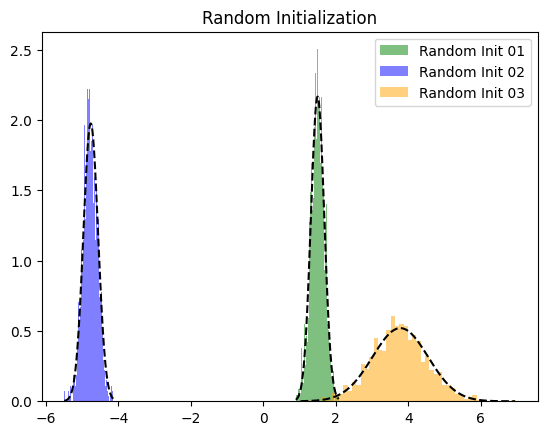

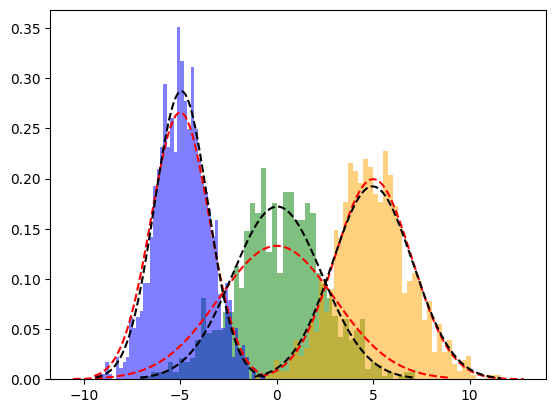

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0])

In [ ]:
train_gmm(X, n_components=3, n_steps=100, plot_intermediate_steps_flag=False)

Коли ми починаємо навчання моделі, ми виконаємо кроки E і M відповідно до встановленого нами параметра n_steps .

Але у фактичних випадках використання ви частіше використовуватимете версію GMM scikit-learn. Там можна знайти додаткові параметри, наприклад

### 3 | використання бібліотеки Sklearn

Застосуємо до того самого набору даних функцію GaussianMixture() бібліотеки Sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

Обчислимо параметри моделі: ваги, середні та дисперсії за допомогою властивостей `gm.weights_`, `means = gm.means_`, `covars = gm.covariances_` відповідно.

Means of components: 
 [[ 4.75402772]
 [-5.07607494]
 [-0.30874339]]
Covars of components: 
 [[[2.18315933]]

 [[1.4453777 ]]

 [[1.96547462]]]


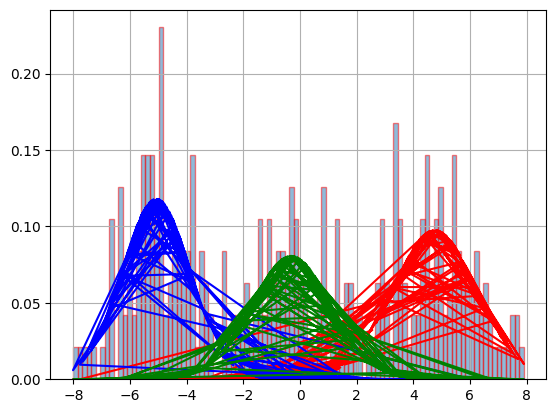

In [ ]:
from matplotlib import rc

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as tkr
import scipy.stats as stats

import numpy as np
from sklearn.mixture import GaussianMixture

data = X.reshape(-1, 1)

gm = GaussianMixture(n_components=3, random_state=0).fit(data)
weights = gm.weights_
means = gm.means_
covars = gm.covariances_

print('Means of components: \n', means)
print('Covars of components: \n',covars)

plt.hist(data, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
plt.plot(data,weights[0]*stats.norm.pdf(data,means[0],np.sqrt(covars[0])), c='red')
plt.plot(data,weights[1]*stats.norm.pdf(data,means[1],np.sqrt(covars[1])), c='blue')
plt.plot(data,weights[2]*stats.norm.pdf(data,means[2],np.sqrt(covars[2])), c='green')
plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()



## Суміші Гаусса та LDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the number of components for the Mixture Discriminant Analysis
n_components = 3  # Number of classes in Iris dataset

# Train Gaussian Mixture Models (GMMs) for each class on normalized data
def train_GMM(class_label):
    X_class = X_train_normalized[y_train == class_label]
    gmm = GaussianMixture(n_components=3)
    gmm.fit(X_class)
    return gmm

gmm_models = list(map(train_GMM, set(y)))

# Define the class priors based on GMM training weights and normalize them
class_priors = np.array([gmm.weights_.sum() / len(X_train) for gmm in gmm_models])
class_priors /= class_priors.sum()

# Train Linear Discriminant Analysis with adjusted class priors on normalized data
lda = LinearDiscriminantAnalysis(priors=class_priors)
# lda = LinearDiscriminantAnalysis()
lda.fit(X_train_normalized, y_train)

# Make predictions on normalized data
y_pred_train_lda = lda.predict(X_train_normalized)
y_pred_test_lda = lda.predict(X_test_normalized)

# Evaluate the model on normalized data
train_accuracy_lda = accuracy_score(y_train, y_pred_train_lda)
test_accuracy_lda = accuracy_score(y_test, y_pred_test_lda)

print("LDA Training Accuracy (with normalization):", train_accuracy_lda)
print("LDA Testing Accuracy (with normalization):", test_accuracy_lda)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
LDA Training Accuracy (with normalization): 0.9714285714285714
LDA Testing Accuracy (with normalization): 1.0


Confusion Matrix:
[[11  0  0]
 [ 0 15  0]
 [ 0  0 19]]
_________________________________________________________________________________


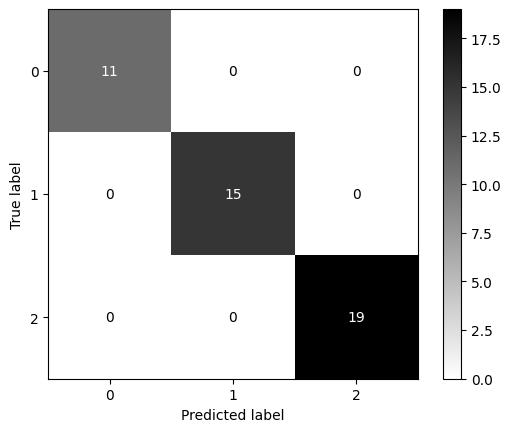

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Обчислення Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_lda)
disp = ConfusionMatrixDisplay(conf_matrix)
print("Confusion Matrix:")
print(conf_matrix, "\033[36m_" * 3**4, sep='\n')

disp.plot(cmap='binary')

# Додаткові матеріали

1. По GMM: https://medium.com/@gallettilance/gmm-clustering-from-scratch-a8d06a47c77d
2. В продовження: https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/
3. https://www.geeksforgeeks.org/gaussian-mixture-model/
4. https://brilliant.org/wiki/gaussian-mixture-model/
5. https://www.youtube.com/watch?v=qMTuMa86NzU
6. https://youtube.com/watch?v=ScduwntrMzc